In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("./Resources/myopia.csv")

# Removing 'target' data as this is unsupervised
data = data.drop(columns = ["MYOPIC"])

data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
#Scale data
data_scaled = StandardScaler().fit_transform(data)

In [4]:
# Initialise PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
data_pca = pca.fit_transform(data_scaled)
print(f"Shape is {data_pca.shape}. Reduces to 10 components to capture 90%, down from 14 - successfuly trims some dimensions, but isn't a huge decrease in data size for this case.")


Shape is (618, 10). Reduces to 10 components to capture 90%, down from 14 - successfuly trims some dimensions, but isn't a huge decrease in data size for this case.


C:\Users\Liam\.conda\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


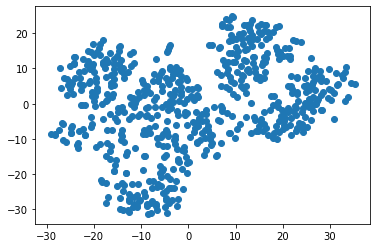

In [5]:
#Using tSNA
tsne = TSNE(learning_rate=35, random_state = 0)
tsne_features = tsne.fit_transform(data_pca)


xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys)
plt.show()

#This does show a few clear clusters, and breaks between them


C:\Users\Liam\.conda\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


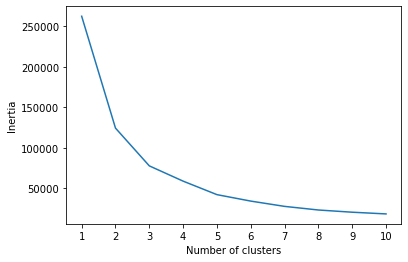

In [6]:
inertia = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    

elbow_data = {"k": range(1,11), "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#There is no clear elbow on this plot, but around 3-4 looks likely

## Recommendation

Visualisation after PCA and TSNE reduction shows that this data reduces to a form with some level of clustering visible. Based on the elbow plot 3 clusters would be sensible, though visual inspection of TSNE results indicates that there may be more clusters, so it is worth experimenting with some higher K values (5-6).